# tf-03-logic
## 目标
本例中，我们要使用tensorflow完成逻辑回归

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
print('tenserflow-version:',tf.__version__)

tenserflow-version: 1.4.0


## 步骤
1、生成模拟数据    
2、设置初始weight和bias都为1  
3、定义损失函数  
4、定义优化器  
5、利用优化器最小化损失函数，tf自动调整weight和bias  
6、初始化变量  
7、创建Session，run  
8、打印出当前迭代次数下得到的weight和bias

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.]


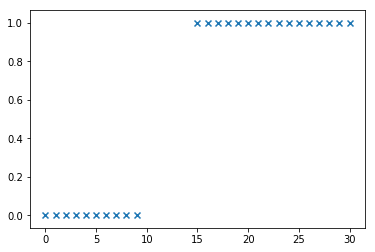

In [40]:
##### x_data = np.arange(30)
x_data = np.append(np.arange(10),np.arange(15,31)).astype(np.float32)
# x_data = np.random.rand(100).astype(np.float32)
print(x_data)
y_data = np.array([(1 if x>10 else 0 ) for x in x_data]).astype(np.float32)
# plt.plot(x_data,y_data,marker='x')
plt.scatter(x_data,y_data,marker='x')
plt.show()

In [41]:
sample_num = len(x_data)

# 权重和偏置不能初始化为1，否则nan
# Weight = tf.Variable([0.1],dtype=tf.float32,name='weight')
# bias = tf.Variable([0.1],dtype=tf.float32,name='bias')
Weight = tf.Variable(np.random.randn(),dtype=tf.float32,name='weight')
bias = tf.Variable(np.random.randn(),dtype=tf.float32,name='bias')

step: 0 ,weight= 0.19638 ,bias= 0.246088
step: 50 ,weight= 0.118771 ,bias= -0.213038
step: 100 ,weight= 0.142246 ,bias= -0.604568
step: 150 ,weight= 0.163419 ,bias= -0.944466
step: 200 ,weight= 0.182534 ,bias= -1.24193
step: 250 ,weight= 0.199862 ,bias= -1.50483
step: 300 ,weight= 0.215657 ,bias= -1.73955
step: 350 ,weight= 0.230143 ,bias= -1.95111
step: 400 ,weight= 0.243505 ,bias= -2.14342
step: 450 ,weight= 0.255899 ,bias= -2.3196
step: 500 ,weight= 0.267452 ,bias= -2.48208
step: 550 ,weight= 0.278272 ,bias= -2.63283
step: 600 ,weight= 0.288446 ,bias= -2.77344
step: 650 ,weight= 0.298048 ,bias= -2.90519
step: 700 ,weight= 0.307142 ,bias= -3.02915
step: 750 ,weight= 0.31578 ,bias= -3.14622
step: 800 ,weight= 0.324006 ,bias= -3.25715
step: 850 ,weight= 0.331861 ,bias= -3.36256
step: 900 ,weight= 0.339379 ,bias= -3.46301
step: 950 ,weight= 0.346587 ,bias= -3.55896
step: 1000 ,weight= 0.353513 ,bias= -3.65081
step: 1050 ,weight= 0.360179 ,bias= -3.73892
step: 1100 ,weight= 0.366604 ,bia

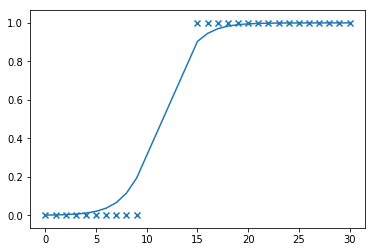

In [44]:

z = Weight*x_data+ bias
h = tf.sigmoid(z)

# loss = tf.reduce_mean(tf.square(h-y_data))
loss = (tf.reduce_sum(y_data*tf.log(h)) + tf.reduce_sum((1-y_data) * (tf.log(1-h)))) / (-sample_num)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(5000):
        sess.run(train,feed_dict={X: x_data, Y: y_data})
        if step % 50 == 0:
            print('step:',step,',weight=',sess.run(Weight),',bias=',sess.run(bias))
            # time.sleep(1)
    plt.scatter(x_data,y_data,marker='x')
    plt.plot(x_data,sess.run(h))
    plt.show()

# 书签
[Machine Learning 学习笔记 (1) —— 线性回归与逻辑回归](https://www.cnblogs.com/tbcaaa8/p/4415429.html)   
[机器学习与TensorFlow编程（2）逻辑线性回归模型](https://www.zybuluo.com/irving512/note/763055)  
[机器学习之逻辑回归及 sklearn 和 Tensorflow 代码示例](https://juejin.im/entry/58f220f0a0bb9f006a95b5ef)